INTRODUCTION

This is a real estate price prediction algorithm that helps user predict future prices of rent and outright sales of landed properties.

This might help in making calculative decision in buying/renting housing properties.

Using Melbourne, Australia as a case study

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [8]:
df1 = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")
df1.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [9]:
df1.shape

(63023, 13)

In [10]:
df1.groupby('Suburb')['Suburb'].agg('count')

Suburb
Abbotsford        183
Aberfeldie        111
Airport West      238
Albanvale          37
Albert Park       185
                 ... 
Yarra Junction      1
Yarrambat           1
Yarraville        432
croydon             1
viewbank            1
Name: Suburb, Length: 380, dtype: int64

In [11]:
df2 = df1.drop(['Address','Type','Method','SellerG','Postcode','CouncilArea'],axis='columns')
df2.head()

,Suburb,Rooms,Price,Date,Regionname,Propertycount,Distance
0,Abbotsford,3,1490000.0,1/04/2017,Northern Metropolitan,4019,3.0
1,Abbotsford,3,1220000.0,1/04/2017,Northern Metropolitan,4019,3.0
2,Abbotsford,3,1420000.0,1/04/2017,Northern Metropolitan,4019,3.0
3,Aberfeldie,3,1515000.0,1/04/2017,Western Metropolitan,1543,7.5
4,Airport West,2,670000.0,1/04/2017,Western Metropolitan,3464,10.4


In [12]:
df2.isnull().sum()

Suburb               0
Rooms                0
Price            14590
Date                 0
Regionname           0
Propertycount        0
Distance             0
dtype: int64

In [13]:
df3 = df2.dropna()
df3.isnull().sum()

Suburb           0
Rooms            0
Price            0
Date             0
Regionname       0
Propertycount    0
Distance         0
dtype: int64

In [14]:
df3.shape

(48433, 7)

In [15]:
#Prices Per Room in AUD(Australian Dollars)

df4 = df3.copy()
df4['price_per_room'] = df4['Price']/df4['Rooms']
df4.head()

,Suburb,Rooms,Price,Date,Regionname,Propertycount,Distance,price_per_room
0,Abbotsford,3,1490000.0,1/04/2017,Northern Metropolitan,4019,3.0,496666.666667
1,Abbotsford,3,1220000.0,1/04/2017,Northern Metropolitan,4019,3.0,406666.666667
2,Abbotsford,3,1420000.0,1/04/2017,Northern Metropolitan,4019,3.0,473333.333333
3,Aberfeldie,3,1515000.0,1/04/2017,Western Metropolitan,1543,7.5,505000.000000
4,Airport West,2,670000.0,1/04/2017,Western Metropolitan,3464,10.4,335000.000000


In [16]:
len(df4.Suburb.unique())

370

In [17]:
df4.Suburb = df4.Suburb.apply(lambda x: x.strip())

In [18]:
Suburb_stats = df4.groupby('Suburb')['Suburb'].agg('count').sort_values(ascending=False)
Suburb_stats

Suburb
Reservoir         1067
Bentleigh East     696
Richmond           642
Craigieburn        598
Preston            593
                  ... 
Cockatoo             1
Chintin              1
Castella             1
Belgrave South       1
Kallista             1
Name: Suburb, Length: 370, dtype: int64

In [19]:
len(Suburb_stats[Suburb_stats<=10])

69

In [20]:
Suburb_stats.values.sum()

48433

In [21]:
Suburb_stats_less_than_10 = Suburb_stats[Suburb_stats<=10]
Suburb_stats_less_than_10

Suburb
Cranbourne North    10
Skye                10
Manor Lakes         10
Docklands            9
Bacchus Marsh        9
                    ..
Cockatoo             1
Chintin              1
Castella             1
Belgrave South       1
Kallista             1
Name: Suburb, Length: 69, dtype: int64

In [22]:
df4.Suburb = df4.Suburb.apply(lambda x: 'other' if x in Suburb_stats_less_than_10 else x)
len(df4.Suburb.unique())

302

In [23]:
df4.head()

,Suburb,Rooms,Price,Date,Regionname,Propertycount,Distance,price_per_room
0,Abbotsford,3,1490000.0,1/04/2017,Northern Metropolitan,4019,3.0,496666.666667
1,Abbotsford,3,1220000.0,1/04/2017,Northern Metropolitan,4019,3.0,406666.666667
2,Abbotsford,3,1420000.0,1/04/2017,Northern Metropolitan,4019,3.0,473333.333333
3,Aberfeldie,3,1515000.0,1/04/2017,Western Metropolitan,1543,7.5,505000.000000
4,Airport West,2,670000.0,1/04/2017,Western Metropolitan,3464,10.4,335000.000000


In [24]:
df4.shape

(48433, 8)

In [25]:
df4.price_per_room.describe()

count    4.843300e+04
mean     3.326746e+05
std      1.682321e+05
min      3.166667e+04
25%      2.190000e+05
50%      2.963750e+05
75%      4.026667e+05
max      3.050000e+06
Name: price_per_room, dtype: float64

In [26]:

# def remove_pps_outliers(df):
#     df_out = pd.DataFrame()
#     for key, subdf in df.groupby('Suburb'):
#         m = np.mean(subdf.price_per_room)
#         st = np.std(subdf.price_per_room)
#         reduced_df = subdf[(subdf.price_per_room>(m-st)) & (subdf.price_per_room<=(m+st))]
#         df_out = pd.concat([df_out,reduced_df],ignore_index=True)
#     return df_out
# df5 = remove_pps_outliers(df4)
# df5.shape

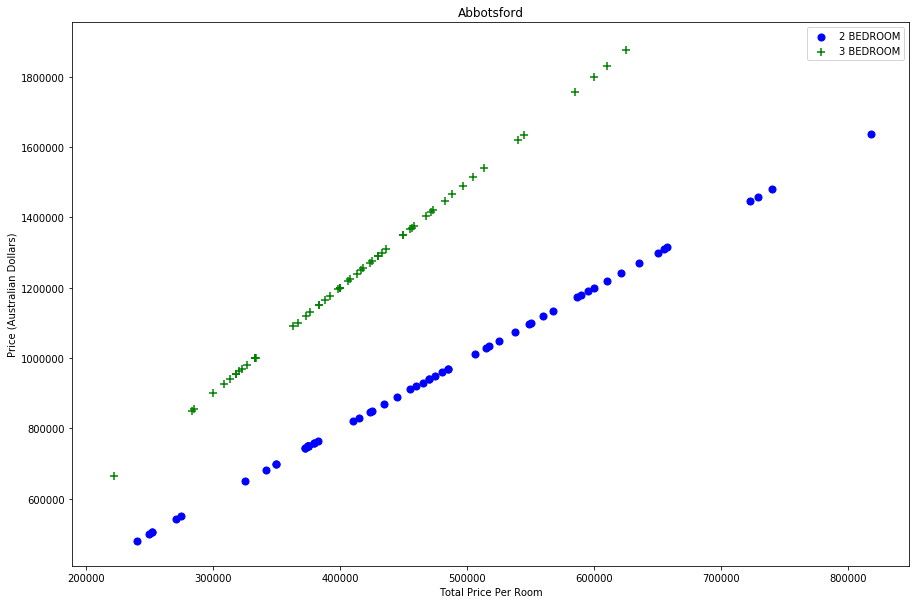

In [27]:
def plot_scatter_chart(df,Suburb):
    bhk2 = df[(df.Suburb==Suburb) & (df.Rooms==2)]
    bhk3 = df[(df.Suburb==Suburb) & (df.Rooms==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.price_per_room,bhk2.Price,color='blue',label='2 BEDROOM', s=50)
    plt.scatter(bhk3.price_per_room,bhk3.Price,marker='+', color='green',label='3 BEDROOM', s=50)
    plt.xlabel("Total Price Per Room")
    plt.ylabel("Price (Australian Dollars)")
    plt.title(Suburb)
    plt.legend()
    
plot_scatter_chart(df4,"Abbotsford")

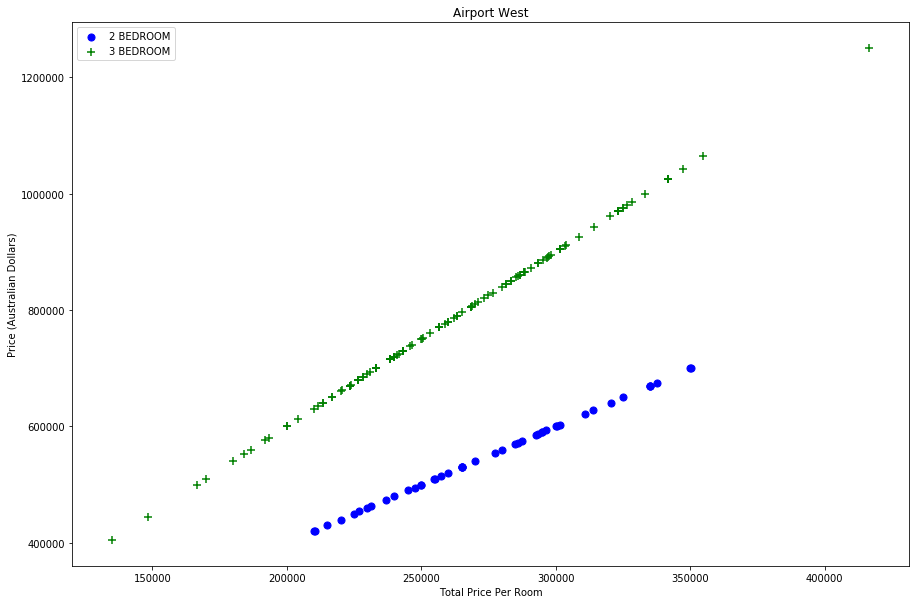

In [28]:
def plot_scatter_chart(df,Suburb):
    bhk2 = df[(df.Suburb==Suburb) & (df.Rooms==2)]
    bhk3 = df[(df.Suburb==Suburb) & (df.Rooms==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.price_per_room,bhk2.Price,color='blue',label='2 BEDROOM', s=50)
    plt.scatter(bhk3.price_per_room,bhk3.Price,marker='+', color='green',label='3 BEDROOM', s=50)
    plt.xlabel("Total Price Per Room")
    plt.ylabel("Price (Australian Dollars)")
    plt.title(Suburb)
    plt.legend()
    
plot_scatter_chart(df4,"Airport West")

In [29]:


def remove_Rooms_outliers(df):
    exclude_indices = np.array([])
    for Suburb, Suburb_df in df.groupby('Suburb'):
        Rooms_stats = {}
        for Rooms, Rooms_df in Suburb_df.groupby('Rooms'):
           Rooms_stats[Rooms] = {
                'mean': np.mean(Rooms_df.price_per_room),
                'std': np.std(Rooms_df.price_per_room),
                'count':Rooms_df.shape[0]
            }
        for Rooms, Rooms_df in Suburb_df.groupby('Rooms') :
            stats = Rooms_stats.get(Rooms-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, Rooms_df[Rooms_df.price_per_room<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df6 = remove_Rooms_outliers(df4)
# df8 = df7.copy()
df6.shape

(21988, 8)

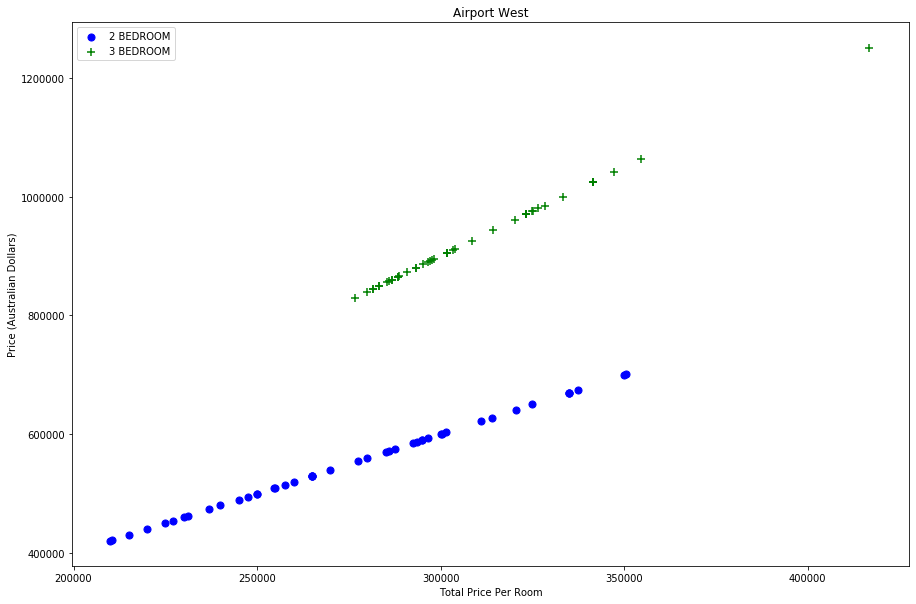

In [30]:
plot_scatter_chart(df6, "Airport West")

Text(0, 0.5, 'Count')

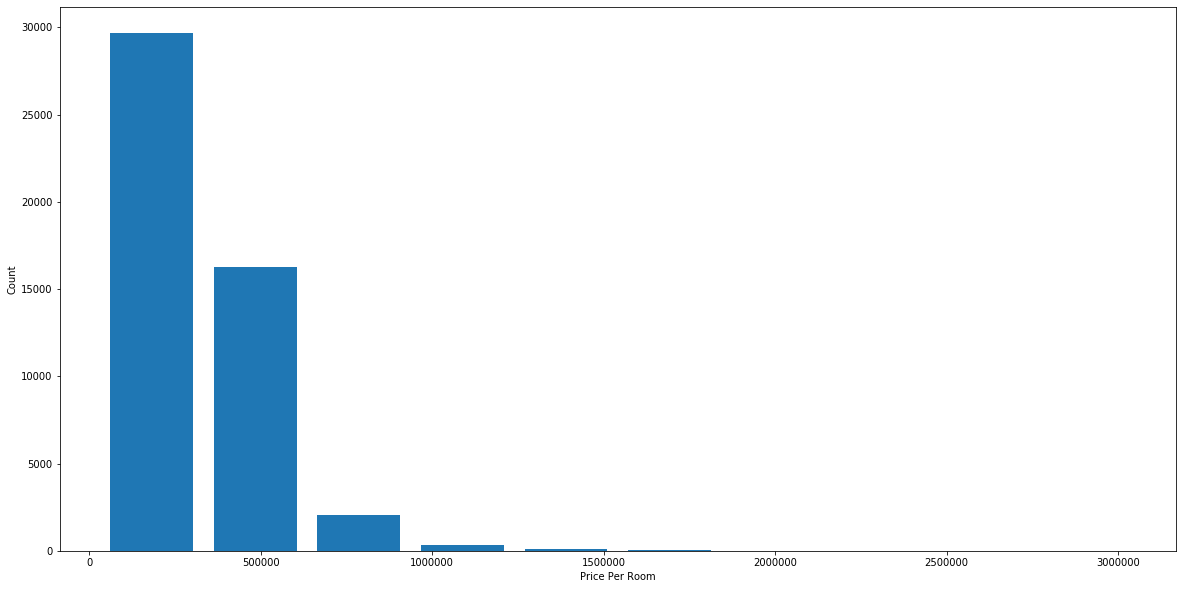

In [31]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df4.price_per_room,rwidth=0.8)
plt.xlabel("Price Per Room")
plt.ylabel("Count")

In [32]:
df6.Distance.unique()

array([ 3. ,  7.5, 10.4,  5.7, 11. ,  6.3,  4.3, 21.5,  7.9,  9.7, 17.3,
       11.4, 13.8, 13.4, 10.9,  8.6, 10.3,  5.2,  4. , 12.1, 14.7,  7.7,
        3.5, 10.1, 14.8,  8.4,  8.7, 11.7, 16.7,  3.6,  6.7,  2. , 20.6,
       14. , 24.7, 18. , 22.2, 12.4, 14.3, 16.1,  8.9,  1.3, 27. ,  7.2,
       19.6,  2.1,  5.1, 15.4, 38. , 36.9,  7.3, 12.9, 11.2, 16. , 18.4,
       12.3,  7.8, 15.5,  3.4,  5.4, 25.2, 12.7,  5.9, 17.4,  0. , 31.7,
       20. , 17.2,  6.2, 26.5, 14.2, 18.8, 34.1,  1.8,  5.3, 47.3,  8.5,
       31.2,  4.6, 12. ,  2.4, 47.4, 19.9, 15.2, 20.5,  2.7,  8.2, 10.5,
       10.2, 15.3,  7. ,  4.1, 21.1,  6.4,  3.1, 16.5,  6.8, 25.5, 27.2,
        9.4, 12.8, 23.2,  1.6, 17.9, 23. , 21.8, 25.9, 13.1, 24.8, 20.4,
       32.3,  8.8, 16.3, 16.2, 22.7, 21.3, 23.8,  5. , 30.4, 14.5, 23.3,
        1.9, 25. , 27.1, 17.5, 29.9, 23.5, 44.2, 16.6, 34.9, 28.5, 45.9,
       14.6, 35.4, 35.2,  9.5, 10.8, 28.8,  0.7, 23.6, 41. , 20.8, 45.2,
        1.4, 17.6, 29.8, 18.7, 48.1, 34.7, 26. , 33

In [33]:
df6[df6.Distance>10]

,Suburb,Rooms,Price,Date,Regionname,Propertycount,Distance,price_per_room
4,Airport West,2,670000.0,1/04/2017,Western Metropolitan,3464,10.4,335000.000000
5,Airport West,2,530000.0,1/04/2017,Western Metropolitan,3464,10.4,265000.000000
6,Airport West,2,540000.0,1/04/2017,Western Metropolitan,3464,10.4,270000.000000
14,Altona,2,860000.0,1/04/2017,Western Metropolitan,5301,11.0,430000.000000
27,Aspendale,4,1431000.0,1/04/2017,South-Eastern Metropolitan,2824,21.5,357750.000000
...,...,...,...,...,...,...,...,...
63012,Frankston,2,375000.0,31/03/2018,South-Eastern Metropolitan,17055,38.0,187500.000000
63014,Frankston,2,345000.0,31/03/2018,South-Eastern Metropolitan,17055,38.0,172500.000000
63015,Frankston,2,340000.0,31/03/2018,South-Eastern Metropolitan,17055,38.0,170000.000000
63016,Frankston,2,347700.0,31/03/2018,South-Eastern Metropolitan,17055,38.0,173850.000000


Text(0, 0.5, 'Count')

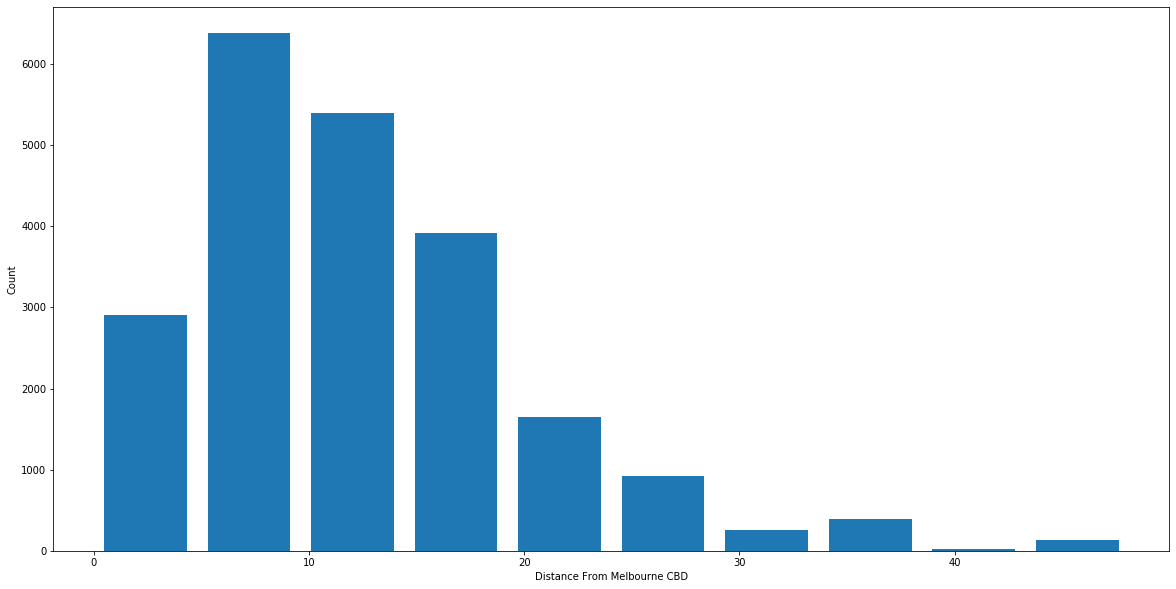

In [34]:
plt.hist(df6.Distance,rwidth=0.8)
plt.xlabel("Distance From Melbourne CBD")
plt.ylabel("Count")

In [35]:
df7 = df6.drop(['Date','price_per_room','Regionname','Propertycount'],axis='columns')
df7.head(3)


,Suburb,Rooms,Price,Distance
0,Abbotsford,3,1490000.0,3.0
2,Abbotsford,3,1420000.0,3.0
3,Aberfeldie,3,1515000.0,7.5


In [36]:
dummies = pd.get_dummies(df7.Suburb)
dummies.head(5)

,Abbotsford,Aberfeldie,Airport West,Albanvale,Albert Park,Albion,Alphington,Altona,Altona Meadows,Altona North,...,Wheelers Hill,Williams Landing,Williamstown,Williamstown North,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df8 = pd.concat([df7,dummies.drop('other',axis='columns')],axis='columns')

In [38]:
df8.head(5)

,Suburb,Rooms,Price,Distance,Abbotsford,Aberfeldie,Airport West,Albanvale,Albert Park,Albion,...,Westmeadows,Wheelers Hill,Williams Landing,Williamstown,Williamstown North,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville
0,Abbotsford,3,1490000.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abbotsford,3,1420000.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Aberfeldie,3,1515000.0,7.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Airport West,2,670000.0,10.4,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Airport West,2,530000.0,10.4,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df9 = df8.drop('Suburb',axis='columns')
df9.head(5)

,Rooms,Price,Distance,Abbotsford,Aberfeldie,Airport West,Albanvale,Albert Park,Albion,Alphington,...,Westmeadows,Wheelers Hill,Williams Landing,Williamstown,Williamstown North,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville
0,3,1490000.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1420000.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1515000.0,7.5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,670000.0,10.4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,530000.0,10.4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# df10 = df9.drop('Date','price_per_room',axis='columns')
# df10.head(5)

In [41]:
# df11 = df10.drop('Regionname',axis='columns')
# df11.head()

In [42]:
X = df9.drop('Price',axis='columns')
X.head(3)

,Rooms,Distance,Abbotsford,Aberfeldie,Airport West,Albanvale,Albert Park,Albion,Alphington,Altona,...,Westmeadows,Wheelers Hill,Williams Landing,Williamstown,Williamstown North,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville
0,3,3.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,7.5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
X.shape

(21988, 303)

In [44]:
X.columns

Index(['Rooms', 'Distance', 'Abbotsford', 'Aberfeldie', 'Airport West',
       'Albanvale', 'Albert Park', 'Albion', 'Alphington', 'Altona',
       ...
       'Westmeadows', 'Wheelers Hill', 'Williams Landing', 'Williamstown',
       'Williamstown North', 'Windsor', 'Wollert', 'Wyndham Vale', 'Yallambie',
       'Yarraville'],
      dtype='object', length=303)

In [94]:
y = df9.Price
y.head()

0    1490000.0
2    1420000.0
3    1515000.0
4     670000.0
5     530000.0
Name: Price, dtype: float64

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=10)

In [117]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9173103340186461

In [118]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.15, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.89050954, 0.93089382, 0.8998919 , 0.91514123, 0.97882419])

In [119]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.15, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
             })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.923052,{'normalize': False}
1,lasso,0.362525,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.932184,"{'criterion': 'mse', 'splitter': 'best'}"


In [45]:
X.columns

Index(['Rooms', 'Distance', 'Abbotsford', 'Aberfeldie', 'Airport West',
       'Albanvale', 'Albert Park', 'Albion', 'Alphington', 'Altona',
       ...
       'Westmeadows', 'Wheelers Hill', 'Williams Landing', 'Williamstown',
       'Williamstown North', 'Windsor', 'Wollert', 'Wyndham Vale', 'Yallambie',
       'Yarraville'],
      dtype='object', length=303)

In [46]:
np.where(X.columns=='Williamstown North')[0][0]

297

In [48]:
def predict_price(Suburb,Distance,Rooms):    
    loc_index = np.where(X.columns==Suburb)[0][0]

    x = np.zeros(len(X.columns))
   
    x[0] = Distance
    x[1] = Rooms
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [49]:
predict_price('Abbotsford',10, 2)

NameError: name 'lr_clf' is not defined

In [144]:
import pickle
with open('melbourne_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [145]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))